# Project 3 - Sam Chen

## Part 1: Regression analysis of Gapminder data

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [347]:
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Exercise 1

Text(0.5, 1.0, 'Life Expectancy over Time')

<Figure size 288x288 with 0 Axes>

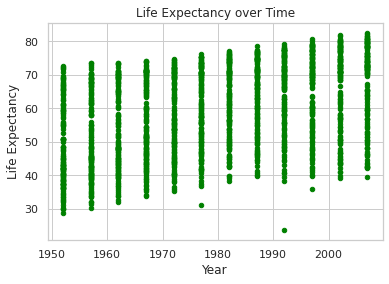

In [348]:
# Using matplotlib to make a scatterplot with the year as the x-axis and the life expectancy as the y-axis
plt.figure(figsize=(4, 4)) 
ax1 = data.plot.scatter(x='year',
                      y='lifeExp',
                      c='Green')
plt.ylabel("Life Expectancy")
plt.xlabel("Year")
plt.title("Life Expectancy over Time")

## Question 1

There appears to be a general increasing trend for life expectancy across time, and it appears to be linear (although we cannot tell by the eye-test the strength of the linear association between year and life expectancy, this should be left to quantitative statistical analysis presumably done later). We can see that the minimums and the maximums at the very least are generally increasing each year (with each year having a pretty substantial distribution/amount of values between its min and max). 

In [349]:
# As suggested in the project directions, I grouped the data by year, 
# and then I stored the life expectancy values for that year in an array.
# Lastly, I collected those arrays into a list: life_exp_per_year
life_exp_per_year = []
years = []
for label, group in data.groupby(['year']):
    life_exp_per_year.append(group['lifeExp'])
    years.append(label)

In [350]:
# Commented this out, but I used it to check that my list looked correct (list of lists)
# life_exp_per_year

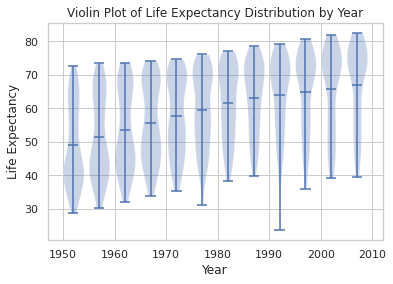

In [351]:
# Using the code given in the project, I created a violin plot with matplotlib 
# of the life expectancy distribution versus year
plt.violinplot(life_exp_per_year,years,widths=4,showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Violin Plot of Life Expectancy Distribution by Year")
plt.savefig("violin.png")

## Question 2

I would describe the distribution of life expectancy across countries for individual years as skewed more and more towards lower values. In the beginning of the dataset, for years until around 1972, the life expectancy values appear to be skewed towards higher values (the lower half of the values below the median have a shorter "range"/length than the upper half). Towards the end (actually, after 1972), we can see that the reverse is true. The life expectancy values for those years appear to be skewed towards lower values (the upper half of the values below the median have a shorter "range"/length than the lower half, thus a measure of central tendency like the mean would be skewed towards a lower value because the lower values have more "pull" on the mean).   
  
The distribution in terms of unimodality for the years until 1977 are generally multimodal, because the violin shows there are two equally significant convexities representing these "cluster" ranges of values. For example, we can see that for the year 1967, the violin plot for that year has two "bumps/bulges." After 1977, this is not the case, and we'd consider the data more unimodal, because the violin plots for those years mostly have a single convexity for the upper half of values.
  
In terms of symmetry, we wouldn't consider the graphs to be symmetric; in regards to the explanations above for skew and unimodality, since most of the violin plots are skewed one way or another, and they have different modalities and distributions for either side of the median, we wouldn't consider these symmetric around the center. 

## Question 3

Since I answered question 1 that yes, I believe there is some sort of relationship (which appears to be linear) between year and life expectancy, I would reject the null hypothesis of no relationship. Now, this is only a more concrete statement after we have the p-value from the linear-regression t-test and we can quantitively reject the null hypothesis with some percentage confidence, but for now, there does appear to be a linear, increasing trend in the dataset between life expectancy and years. I am predicting that there is some relationship, and thus, I would reject the null hypothesis. 

## Question 4

A violin plot of residuals from the linear model in Question 3 vs year should look like they're more centered around 0 (symmetric with the median of residuals around 0 for each year). Since we're expecting and we can visually see a linear trend, then when we create some regression line of best fit, than it'll model the data around it in this "balanced manner", and so there'll be an equal distribution of residuals that are positive (actual value is greater than the predicted value) and residuals that are negative (actual value is less than the predicted value). 

## Question 5

The answer for this is a bit similar to my explanation for question 4, but the violinplot of the residuals vs. year should look symmetrical (not too much skew on either side of the median), and with its median close to 0 so that the distribution is centered around 0. We are, however, assuming that a good regression line fit is based off a single explanatory variable (in this case, year) with no underlying factors. So, the margin of error between the predicted values and the actual values for life expectancy based on our intuition and these assumptions should not be too large. 

## Exercise 2

In [352]:
# Following an online example of performing linear regression analysis with sklearn's linear_model library
# Create a linear regression object from the library
regr = linear_model.LinearRegression()
# I do have to reshape the year so that the year's are split into a single column (n x 1) shaped array, as
# necessitated by the regression fit function
yearReshape = np.array(data['year']).reshape(-1, 1)
lifeExpReshape = np.array(data['lifeExp']).reshape(-1,1)
# Perform the linear regression best fit with year as independent x-variable, life expectancy as dependent y-variable, 
# this is the data used to train the linear regression analysis
regr.fit(yearReshape, lifeExpReshape)
lifeExp_pred = regr.predict(yearReshape)

In [353]:
# Show the coefficients
print('Coefficients: \n', regr.coef_)
# Show the mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(lifeExpReshape, lifeExp_pred))
# Show coefficient of determination, which is the R-squared value
print('Coefficient of determination (R-squared value): %.5f'
      % r2_score(lifeExpReshape, lifeExp_pred))
# Show the correlation coefficient, which is the r value
print('Correlation coefficient, R): %.5f'
      % math.sqrt(r2_score(lifeExpReshape, lifeExp_pred)))

Coefficients: 
 [[0.32590383]]
Mean squared error: 135.11
Coefficient of determination (R-squared value): 0.18976
Correlation coefficient, R): 0.43561


In [354]:
# I wanted to look for some Python library that would give me the nice two-variable statistics similar to what
# you can get with a TI-84 calculator for example, that will give me the coefficients and intercepts of the linear
# regression analysis in a readable format.
# I found this website: https://scipy-lectures.org/packages/statistics/index.html
# leading me to try statsmodels, a Python module that provides a complement to scipy for statistical computations
# This is following their introductory example on their home page: 

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Using ols as ordinary least squares regression for regression analysis 
# (standard to minimize the sum of the squares of the residuals, also known as line of best fit)
results = smf.ols('lifeExp ~ year', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           7.55e-80
Time:                        18:59:08   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

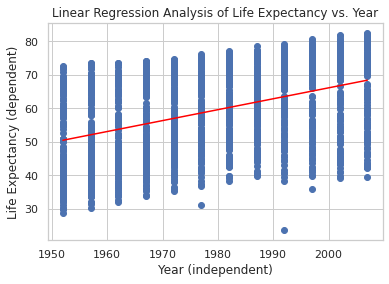

In [355]:
# I did end up plotting the linear regression model we created above for life expectancy vs. year if we 
# treated year as a continuous variable
fit, ax = plt.subplots() 
ax.scatter(data['year'], data['lifeExp'])
ax.set_xlabel("Year (independent)")
ax.set_ylabel("Life Expectancy (dependent)")
ax.set_title("Linear Regression Analysis of Life Expectancy vs. Year")
# This plots the actual regression line (color red) on the axes subplot instance
ax.plot(yearReshape, regr.predict(yearReshape), color = 'red')

The LinearRegression function from SKLearn allows us to fit a linear regression model onto our data; the slope of the line represents the expected average increase in life expectancy per year, and the y-intercept (not shown in the graph) represents the expected life_expectancy in the year 0. 

## Question 6

Both the linear regression fitted from sklearn's linear_model library and the linear regression calculated by statsmodels show that the coefficient for the explanatory variable (year) is 0.3259. On average, then, we expect the life expectancy to increase every year by 0.3259 around the world.

## Question 7

In [356]:
# After realizing that sklearn's linear_model does not easily give a numerical p-value for its linear regression analysis,
# but statsmodels does, I decided to just get the p_value from statsmodels in order to see whether I should reject our
# null hypothesis or not. 
# There's no need to correct or adjust the degrees of freedom because according to the documentation, the default
# number of explanatory variables subtracted is one, which, in this case, is exactly what we're looking at (year is 
# the explanatory variable)
results.f_pvalue

7.546794625594231e-80

The p_value given by statsmodels helps us to quantitatively reject or accept our null hypothesis, and in this case, with a p-value of 7.54679463E-80, which is extremely small and close to 0, we would reject the null hypothesis. The P-value is less than the typical significance level we use to accept/reject the null hypothesis (alpha = 0.05), meaning we reject the null hypothesis; there is sufficient evidence given by the data that the slope is not equal to 0 and that there is a linear association between year and life expectancy.

## Exercise 3

In [357]:
# In order to make a violin plot of residuals vs. year for the linear model from Exercise 2, I first
# put a new column 'residuals' into the dataframe with the residual value for the series
regr = linear_model.LinearRegression()
yearReshape = np.array(data['year']).reshape(-1, 1)
lifeExpReshape = np.array(data['lifeExp']).reshape(-1,1)
regr.fit(yearReshape, lifeExpReshape)
lifeExp_pred = regr.predict(yearReshape)
for index, row in data.iterrows():
    # This is the formula for a residual, the actual value minus the predicted value
    # The predicted value is based on the regression line generated before in Exercise 2
    data.loc[index, 'residuals'] = row['lifeExp'] - lifeExp_pred[index][0]
# Check whether the new column was added correctly
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,residuals
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,-21.711084
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,-21.809603
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,-21.774122
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,-21.380642
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,-20.942161


In [358]:
# Again, as suggested in the project directions, I grouped the data by year, 
# and then I stored residual values for that year in an array.
# Lastly, I collected those arrays into a list: residuals_per_year
residuals_per_year = []
years = []
for label, group in data.groupby(['year']):
    residuals_per_year.append(group['residuals'])
    years.append(label)

Text(0.5, 1.0, 'Residual Distribution by Year')

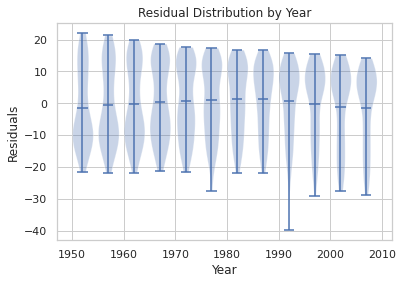

In [359]:
#  Plot the residuals per year as a violinplot using matplotlib
plt.violinplot(residuals_per_year,years,widths=4,showmeans=True)
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.title("Residual Distribution by Year")

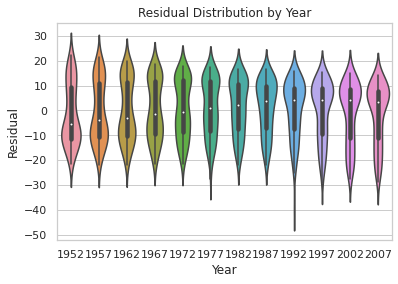

In [360]:
# With some experimentation, I tried out seaborn (especially for the next exercise, where I couldn't get
# the above method to work by continent), and what's interesting is that the violin looks a bit taller (they show the
# extremely narrow probability tails/edges, but you can still see that the boxplot ranges align 
# correctly from one graph to another)
import seaborn as sns
sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='year', y = 'residuals', data=data)
ax.set_title('Residual Distribution by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Residual')
plt.show()

## Question 8

Yes and no; the violinplots of the residuals versus the year have distributions centered around 0 and the medians are close to 0 as I predicted. However, some years still have visible skew and different shapes/distributions for each year; this is due to an error on my part. Even though it makes sense for a good linear regression to "balance" out the residuals, balance in this case only means that the distributions are centered with the medians near 0. It has no implication on skew/a symmetric distribution (some residuals can be far off if they're outlier data points, and this would cause some sort of skew to appear in the residual violin plots). 

## Exercise 4

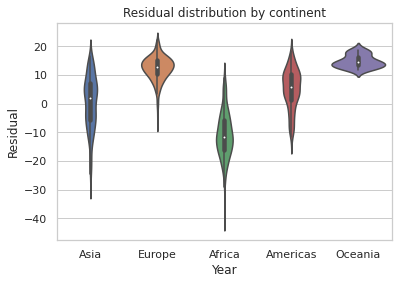

In [361]:
# For some reason, violin plot for matplotlib was not working with categorical data grouped by continent
# However, seaborn should be able to correctly create the violin plots by continent,
# plotting residuals vs. continent
import seaborn as sns
sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='continent', y = 'residuals', data=data)
ax.set_title('Residual distribution by continent')
ax.set_xlabel('Year')
ax.set_ylabel('Residual')
plt.show()

## Question 9

Yes, I think it's clear from Exercise 4 that there is a dependence between model residual and continent. The residual destribution by continent reveals very unique distributions with different centers of residuals by continent; each violin plot has a different shape, and the majority of the continents do not have residual distributions centered around 0.
This suggests that, when performing a regression analysis of life expectancy across time, we only accounted for a single explanatory variable, but in truth, it looks like the year has a different association with the life expectancy depending on which continent we're considering. As such, we should get a better and more accurate regression fit if we grouped the data by continent and factored in the continent as an interaction term with the year for the regression.

## Exercise 5

In [362]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,residuals
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,-21.711084
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,-21.809603
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,-21.774122
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,-21.380642
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,-20.942161


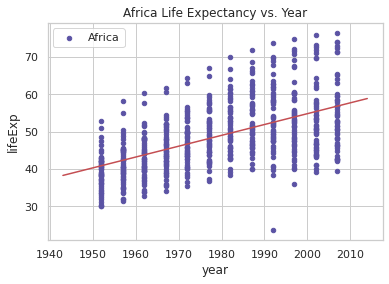

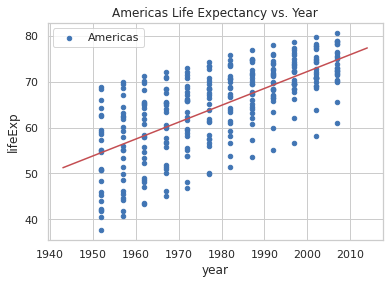

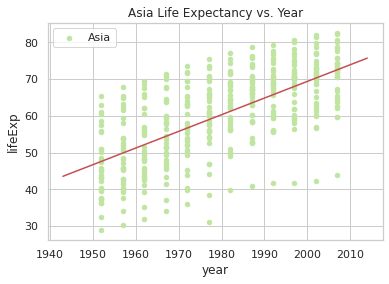

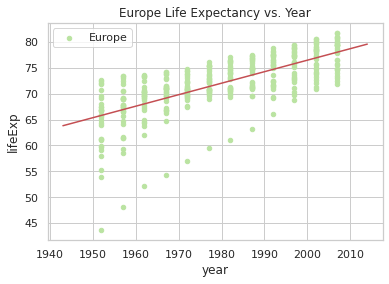

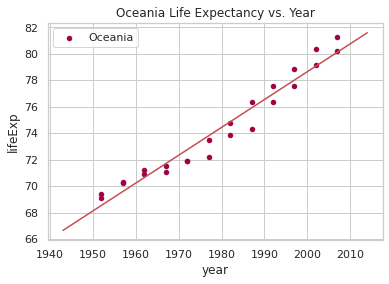

In [363]:
# Honestly used the Internet to see how I could get a unique color each continent, but I also
# decided it would be better to give one scatter plot per continent, each with its own regression line.
cmap = plt.cm.get_cmap('Spectral')
# Creating a unique color for each unique continent name
color_dict = pd.Series({k:cmap(np.random.rand()) for k in data['continent'].unique()})
color_dict.name = 'color_dict'
dataContinents = data.groupby('continent')
# I grouped the data by continent, then for each group, I made a scatter plot of that group's life expectancy values
# versus the year, and created a linear regression line with numpy's polyfit function
for name, group in dataContinents:
    group.plot(kind = 'scatter', x = 'year', y = 'lifeExp', title = name + " Life Expectancy vs. Year", label = name, 
               xlabel = 'Year', ylabel = 'Life expectancy', color = color_dict[name])
    x = group['year']
    y = group['lifeExp']
    model = np.polyfit(x, y, 1)
    predict = np.poly1d(model)
    xmin, xmax = ax3.get_xlim()
    x_lin_reg = range(int(xmin) - 1, int(xmax) + 2)
    y_lin_reg = predict(x_lin_reg)
    plt.plot(x_lin_reg, y_lin_reg, c = 'r')

## Question 10

Yes, based on theses plots, our regression model should include an interaction term for continent and year. 
By looking at each of these plots, they all have different distributions of values (ex: there's a stark difference between Oceania and Americas distribution of values just by looking at them) , but more importantly, they have different regression lines that fit the values best according to each continent. For example, all of the slopes are increasing for each continent, but Oceania appears to have a much steeper slope than Europe. The data also isn't randomly distributed across different continents; each continent has its own unique regression that looks like a best fit for its data. Thus, these plots further support the notion that we'd get a better regression fit if we took into consideration an interaction term for continent and year.

## Exercise 6

In [364]:
continent_feature = pd.get_dummies(data.continent, drop_first=True, prefix='continent')

standard_features = data[['year','lifeExp']]

combined_features = pd.concat([standard_features, continent_feature], axis=1)

continents = data.continent.values

for s in filter(lambda s: s != 'Africa', continents):
    combined_features["year*"+s] = combined_features["continent_"+s]*combined_features['year']

In [365]:
combined_features.head()

,year,lifeExp,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,year*Asia,year*Europe,year*Americas,year*Oceania
0,1952,28.801,0,1,0,0,1952,0,0,0
1,1957,30.332,0,1,0,0,1957,0,0,0
2,1962,31.997,0,1,0,0,1962,0,0,0
3,1967,34.020,0,1,0,0,1967,0,0,0
4,1972,36.088,0,1,0,0,1972,0,0,0


In [366]:
x = combined_features.drop('lifeExp', axis=1)
y = combined_features['lifeExp']

lr = linear_model.LinearRegression()
lr.fit(x,y)
combined_pred = lr.predict(x)

In [367]:
# Show the coefficients
print('Coefficients: \n', lr.coef_)
# Show the mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, combined_pred))
# Show the coefficient of determination, which is the R-squared value
print('Coefficient of determination (R-squared value): %.5f'
      % r2_score(y, combined_pred))
# Show the correlation coefficient, which is the r value
print('Correlation coefficient, R): %.5f'
      % math.sqrt(r2_score(y, combined_pred)))

Coefficients: 
 [ 2.89529263e-01 -1.38848447e+02 -3.12633049e+02  1.56846852e+02
  1.82349883e+02  1.63593141e-01 -6.75971185e-02  7.81216740e-02
 -7.92568854e-02]
Mean squared error: 51.24
Coefficient of determination (R-squared value): 0.69270
Correlation coefficient, R): 0.83228


$\text{lifeExp} = \beta_0 + \beta_1 \times \text{year} + \beta_2 \times \text{Americas} + \beta_3 \times \text{Asia} + \beta_4 \times \text{Europe} + \beta_5 \times \text{Oceania} + \beta_6 \times \text{year} \times \text{Asia} + \beta_7 \times \text{year} \times \text{Europe} + \beta_8 \times \text{year} \times \text{Americas} + \beta_9 \times \text{year} \times \text{Oceania}$

$\beta_1 = 2.89529263e-01$  
$\beta_2 = -1.38848447e+02$  
$\beta_3 = -3.12633049e+02$  
$\beta_4 = 1.56846852e+02$  
$\beta_5 = 1.82349883e+02$  
$\beta_6 = 1.63593141e-01$  
$\beta_7 = -6.75971185e-02$  
$\beta_8 = 7.81216740e-02$  
$\beta_9 = -7.92568854e-02$  

## Question 11

Not all parameters in the model are significantly different from zero. For example, B0 (y-intercept), B5 (Oceania coefficient), B6 (year * Asia coefficient), B7 (year * Europe coefficient), and B8 (year * Americas coefficient) are extremely small values, and they are not significantly different from zero. 

## Question 12

For America, on average, life expectancy increases each year by (−138.848447 + 0.00781216740 * year)  
For Asia, on average, life expectancy increases each year by (−312.633049 + 0.163593141 * year)  
For Europe, on average, life expectancy increases each year by (156.846852 - 0.0675971185 * year)  
For Oceania, on average, life expectancy increases each year by (182.349883 − 0.0792568854 * year)  

## Exercise 7

In [368]:
# Creating a list of the residuals based on our linear regression with the interaction term of continent and year
combined_features['Prediction'] = lr.predict(x)
# Residual formula is actual life expectancy value minus the predicted life expectancy value
combined_features['Residual'] = combined_features['lifeExp'] - combined_features['Prediction']

years = data.year.values
# For each year, we take all the years that match up with that year in combined_features dataframe, 
# and we put its associated residual value in the list residual_per_year
residual_per_year = [(combined_features[combined_features['year'] == year])['Residual'] for year in years]

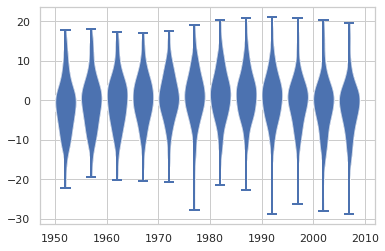

In [369]:
# Make a violin plot of residuals vs. year for the interaction model
plt.violinplot(residual_per_year, years, widths=4)
plt.show()